In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from joblib import dump, load

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# The Data


>The Multi-Domain Sentiment Dataset contains product reviews taken from Amazon.com from many product types (domains). Some domains (books and dvds) have hundreds of thousands of reviews. Others (musical instruments) have only a few hundred. Reviews contain star ratings (1 to 5 stars) that can be converted into binary labels if needed. This page contains some descriptions about the data. If you have questions, please email Mark Dredze or John Blitzer. 

http://www.cs.jhu.edu/~mdredze/datasets/sentiment/

"""This script parse amazon books revies xml to a csv file
parse_xml2csv()
"""

from tqdm import tqdm
import csv

def parse_xml2csv(): 
    dataset_file = './data/amazon_reviews/sorted_data/books/unlabeled.review'
    output_file = './data/amazon_reviews/csv/books_reviews.csv'
    
    def _active_tag(tag):
        if f'<{tag}>' in line:
            rw[tag] = ''
            return tag
        elif f'</{tag}>' in line:
            return '#end_tag#'
    
    # columns = ['product_name', 'rating', 'title', 'review_text']
    columns = ['rating', 'review_text']
    active_tag = None
    
    csvfile = open(output_file, 'w', newline='')
    csvwriter = csv.DictWriter(csvfile, fieldnames=columns)
    csvwriter.writeheader()
    
    with open(dataset_file, 'r', encoding='utf-8', errors='ignore') as fp:
        for line in tqdm(fp):
            if '<review>' in line:
                rw = {}
                continue
            elif '</review>' in line:
                csvwriter.writerow(rw)
            
            tags = map(_active_tag, columns)
            tag = next((i for i in tags if i is not None), None)
            
            if tag == '#end_tag#':
                rw[active_tag] = rw[active_tag].strip()
                active_tag = None
                continue
            elif tag is not None:
                active_tag = tag
                continue
            
            if active_tag is not None:
                rw[active_tag] += line
    
    csvfile.close()

# Running the parser    
parse_xml2csv()

In [0]:
csv_file = '../content/gdrive/My Drive/NLP-data/books_reviews.csv'
df = pd.read_csv(csv_file)

In [0]:
df['rating'] = df['rating'].astype('category')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973194 entries, 0 to 973193
Data columns (total 2 columns):
rating         973194 non-null category
review_text    973183 non-null object
dtypes: category(1), object(1)
memory usage: 8.4+ MB


In [0]:
df.head(100)

,rating,review_text
0,5.0,This all-Spanish handbook for parents with new...
1,5.0,McCarthy's writing and portrayal of Lester Bal...
2,2.0,Do you giggle uncontrollably when poking corps...
3,5.0,I was initiated into the world of Cormac McCar...
4,4.0,I cannot speak to the literary points in the n...
5,4.0,There is no denying the strain of Faulkner tha...
6,5.0,I have read sevral of McCarthy's other novels....
7,5.0,This is a gripping novel that probes the bread...
8,1.0,"If you're considering buying the Peter Smith ""..."
9,2.0,What I didn't realise when I ordered this is t...


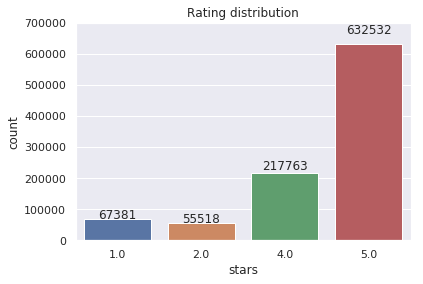

In [0]:
def plot_rating_dist(df, x='rating', title='Rating distribution', xlabel='stars', ylim=700000):
    ax = sns.countplot(x=x, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    for rect in ax.containers[0]:
        tw = rect.get_width() / 2.
        tx = rect.get_x() + tw
        height = rect.get_height()
        ty = 1.05 * height
        ax.text(tx, ty, height, ha='center')

    ax.set_ylim(0, ylim)
    
plot_rating_dist(df)

In [0]:
# Sample to see words count per review
df_ = df.iloc[:100000]
words_counts = df_[df_['review_text'].str.len() > 10]['review_text'].str.split().apply(len)
words_counts.describe()

count    99987.000000
mean       166.391191
std        183.571081
min          2.000000
25%         59.000000
50%        110.000000
75%        206.000000
max       5775.000000
Name: review_text, dtype: float64

Text(0.5, 1.0, 'Words / Review')

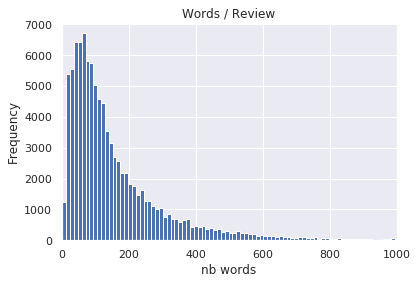

In [0]:
words_counts.plot.hist(bins=500, xlim=[0, 1000])
plt.xlabel('nb words')
plt.title('Words / Review')

In [0]:
def binary_labels(df, min_set=None):
 
    # Cleanning data set
    count = df['review_text'].str.len()
    df = df[(count > 3) | (count < 4000)].copy()
    
    # Equilize dataset sample size
    if min_set is None:
        min_set = df['rating'].value_counts().min() * 4
    
    # Split rating 1.0, 2.0 as negative reviews
    rating_1 = df[df['rating'] == 1.0].iloc[:min_set // 4]
    rating_2 = df[df['rating'] == 2.0].iloc[:min_set // 4]
    negative_reviews = pd.concat([rating_1, rating_2])
    negative_reviews['label'] = 0
    
    # Split rating 4.0, 5.0 as positive reviews
    rating_4 = df[df['rating'] == 4.0].iloc[:min_set // 4]
    rating_5 = df[df['rating'] == 5.0].iloc[:min_set // 4]
    positive_reviews = pd.concat([rating_4, rating_5])
    positive_reviews['label'] = 1
    
    dataset = pd.concat([negative_reviews, positive_reviews])
    dataset.sort_index(inplace=True)
    
    return dataset

dataset = binary_labels(df,  min_set=50000)

In [0]:
dump(dataset.index, '../content/gdrive/My Drive/NLP-data/dataset_index.joblib')

['../content/gdrive/My Drive/NLP-data/dataset_index.joblib']

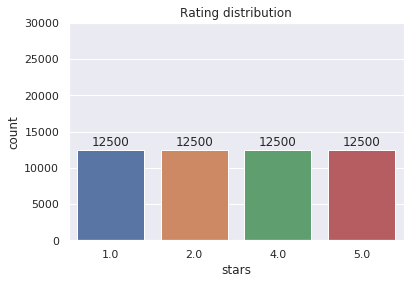

In [0]:
plot_rating_dist(dataset, ylim=30000)

texts size:  50000
labels size:  50000


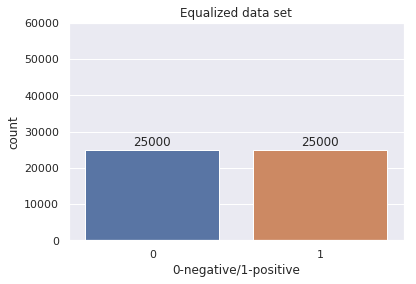

In [0]:
texts = dataset['review_text'].astype(str)
labels = dataset['label'].astype('int32')

print('texts size: ', texts.size)
print('labels size: ', labels.size)

plot_rating_dist(pd.concat([texts, labels], axis=1), x='label', title='Equalized data set', xlabel='0-negative/1-positive', ylim=60000)

In [0]:
import pprint as pp

sample = df[df['rating'] == 2].sample(1)
pp.pprint(sample['review_text'].values[0])
print('-'*100)
print('Number of words: %d' % sample['review_text'].str.split().apply(len))
print('Rating: %d stars' % sample['rating'].values[0])

('Seeing a few of the unrealistically rave reviews of this flawed novel '
 'reminds me to remind everyone how tainted the amazon reader review process '
 "is.  When anyone can review a book there's the chance that the authors "
 'publicist, best friend, next-door-neighbor, and even mother can write a '
 'glowing review.  I\'m always suspicious of "best novel ever" reviews..')
----------------------------------------------------------------------------------------------------
Number of words: 57
Rating: 2 stars


# Pretrained Embedding Matrix
GloVe embedding data can be found at:
http://nlp.stanford.edu/data/glove.6B.zip
(source page: http://nlp.stanford.edu/projects/glove/)

In [0]:
from nltk import word_tokenize
import nltk
import numpy as np

from keras.layers import Embedding
from keras.initializers import Constant
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
# Setting up the model

MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 400
EMBEDDING_DIM = 100
VALIDATION_SPLIT = .1

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
word_tokenize("I didn't like it")

['I', 'did', "n't", 'like', 'it']

In [0]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r') as f:
        embeddings_vecs = {}
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, 'f', sep=' ')
            embeddings_vecs[word] = coefs
    
    return embeddings_vecs

In [0]:
embeddings_vecs = read_glove_vecs('../content/gdrive/My Drive/NLP-data/glove.6B.100d.txt')

print('Found %s word vectors.' % len(embeddings_vecs))

Found 400000 word vectors.


In [0]:
# The tokenizer need to able to split contraction so don't -> ['do','n't']
from scipy.spatial.distance import cosine

assert "don't" not in embeddings_vecs

word = {}
word["n't"] = embeddings_vecs["n't"]
word["not"] = embeddings_vecs["not"]

print("Similarity between %s and %s is %f" % ("n't", "not", 1 - cosine(word["n't"], word["not"])))

Similarity between n't and not is 0.901041


In [0]:
# replace keras default tokenizer

from keras_preprocessing import text

def _text_to_word_sequence(text,
                          filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                          lower=True, split=" "):
    
    text = text.lower()
    
    translate_dict = dict((c, split) for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    seq = word_tokenize(text)
    return [i for i in seq if i]

text.text_to_word_sequence = _text_to_word_sequence

tokenizer = text.Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 87719 unique tokens.


In [0]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [0]:
pp.pprint(data[0].tolist(), width=200, compact=True)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0

In [0]:
def pretrained_embedding_matrix(embeddings_vecs, word_index):
    """
    Build embedding matrix
    
    Params:
    embeddings_vecs -- dict with words and its respective vectors {word: coefs}
    word_index -- dict with words and its indexes
    
    Returns:
    embedding_matrix -- numpy array shape (words in vocabulary, embedding dim)
    """
    
    num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
    
    embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
    
    for word, i in word_index.items():
        if i > MAX_NUM_WORDS:
            break
        embedding_vector = embeddings_vecs.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    
    return embedding_matrix

In [0]:
embedding_matrix = pretrained_embedding_matrix(embeddings_vecs, word_index)

In [0]:
embedding_matrix.shape

(20001, 100)

In [0]:
# Split the date into train and validation sets
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

X_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
X_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

In [0]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape, 'type', y_train.dtype)
print('y_val shape:', y_val.shape, 'type', y_val.dtype)

X_train shape: (45000, 400)
X_val shape: (5000, 400)
y_train shape: (45000,) type int32
y_val shape: (5000,) type int32


# Keras CNN model
1D convnet with global maxpooling

In [0]:
from keras.layers import Dense, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Input
from keras.models import Model
from keras.initializers import Constant

from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [0]:
K.clear_session()

W0706 00:29:41.306179 140513222641536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0706 00:29:41.308264 140513222641536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0706 00:29:41.327854 140513222641536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
def cnn_model(embedding_matrix):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    
    num_words = embedding_matrix.shape[0]
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False,
                                mask_zero=False) 
    
    embedded_sequences = embedding_layer(sequence_input)
    
    X = Conv1D(128, 5, activation='relu')(embedded_sequences)
    X = MaxPooling1D(5)(X)
    X = Conv1D(128, 5, activation='relu')(X)
    X = MaxPooling1D(5)(X)
    X = Conv1D(128, 5, activation='relu')(X)
    X = GlobalMaxPooling1D()(X)
    X = Dense(128, activation='relu')(X)
    preds = Dense(1, activation='sigmoid')(X)

    model = Model(sequence_input, preds)
    
    return model


In [0]:
# Callbacks
checkpoint = ModelCheckpoint(filepath='../content/gdrive/My Drive/NLP-data/CNN_model_weights.{epoch:02d}-{val_acc:.2f}.hdf5',
                             monitor='val_acc', 
                             mode='max', 
                             verbose=1, 
                             save_best_only=True)

In [0]:
model = cnn_model(embedding_matrix)
model.summary()

W0706 00:29:46.797476 140513222641536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 00:29:46.856213 140513222641536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 00:29:46.893971 140513222641536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 400)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 400, 100)          2000100   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 396, 128)          64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 79, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 75, 128)           82048     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 15, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 11, 128)           82048     
__________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0706 00:29:51.099386 140513222641536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 00:29:51.126637 140513222641536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
%%time

history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint])

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 10s 214us/step - loss: 0.5210 - acc: 0.7298 - val_loss: 0.3923 - val_acc: 0.8354

Epoch 00001: val_acc improved from -inf to 0.83540, saving model to ../content/gdrive/My Drive/NLP-data/CNN_model_weights.01-0.84.hdf5
Epoch 2/15
45000/45000 [==============================] - 4s 94us/step - loss: 0.3197 - acc: 0.8659 - val_loss: 0.3743 - val_acc: 0.8476

Epoch 00002: val_acc improved from 0.83540 to 0.84760, saving model to ../content/gdrive/My Drive/NLP-data/CNN_model_weights.02-0.85.hdf5
Epoch 3/15
45000/45000 [==============================] - 4s 96us/step - loss: 0.2175 - acc: 0.9155 - val_loss: 0.7036 - val_acc: 0.7208

Epoch 00003: val_acc did not improve from 0.84760
Epoch 4/15
45000/45000 [==============================] - 4s 93us/step - loss: 0.1431 - acc: 0.9474 - val_loss: 0.7984 - val_acc: 0.7250

Epoch 00004: val_acc did not improve from 0.84760
Epoch 5/15
45000/45000 [

In [0]:
def plot_results(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

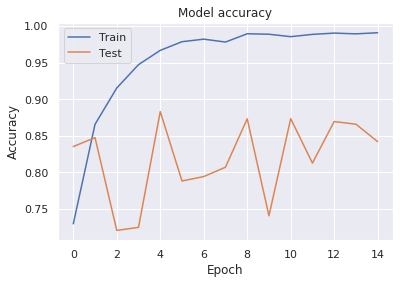

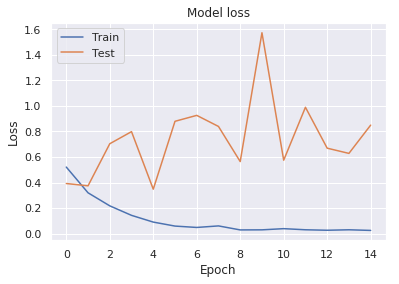

In [0]:
plot_results(history)

In [0]:
model.save(filepath='../content/gdrive/My Drive/NLP-data/CNN_model_weights_last_epoch.hdf5')

# Keras RNN model

In [0]:
from keras.models import Model
from keras.layers import LSTM, Dense, Input
from keras import backend as K

In [0]:
K.clear_session()

In [0]:
def lstm_model(embedding_matrix):
    num_words = embedding_matrix.shape[0]
    
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False, 
                                mask_zero=True) 
    
    embedded_sequences = embedding_layer(sequence_input)
    
    X = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
    preds = Dense(1, activation='sigmoid')(X)

    model = Model(sequence_input, preds)
    
    return model

In [0]:
# Callbacks
checkpoint = ModelCheckpoint(filepath='../content/gdrive/My Drive/NLP-data/LSTM_model_weights.{epoch:02d}-{val_acc:.2f}.hdf5',
                             monitor='val_acc', 
                             mode='max', 
                             verbose=1, 
                             save_best_only=True)

In [0]:
model = lstm_model(embedding_matrix)
model.summary()

W0706 12:49:44.110970 139724865861504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 12:49:44.161819 139724865861504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 12:49:44.211842 139724865861504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 12:49:44.331646 139724865861504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0706 12:49:44.346419 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 400)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 400, 100)          2000100   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,117,477
Trainable params: 117,377
Non-trainable params: 2,000,100
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0706 12:49:51.959539 139724865861504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 12:49:51.986420 139724865861504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
%%time

history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 2944/45000 [>.............................] - ETA: 5:36 - loss: 0.6754 - acc: 0.5798

In [0]:
plot_results(history)

In [0]:
model.save(filepath='../content/gdrive/My Drive/NLP-data/LSTM_model_weights_last_epoch.hdf5')